# Employee Performance Prediction

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#since the data is an excel spreadsheet, we need to import xlrd to import excel data
import xlrd

In [10]:
#reading the data and saving it in emp object
emp = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [34]:
#exploring th data
emp.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


In [ ]:
#since EmpNumber will be of no use for us, we can delete this column from the data
emp=emp.drop('EmpNumber',axis=1)

In [22]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
EmpLastSalaryHikePercent        1200 non-null int64
Em

In [23]:
#checking for na values in the data
emp.isna().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

Text(0.5, 1.0, 'Distribution of Performance Ratings in the Dataset')

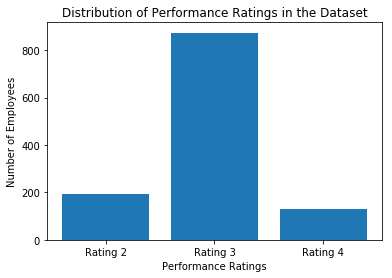

In [26]:
y_bar=np.array([emp[emp['PerformanceRating']==2].shape[0],
                emp[emp['PerformanceRating']==3].shape[0],
                emp[emp['PerformanceRating']==4].shape[0]])

x_bar=['Rating 2','Rating 3','Rating 4']

#Bar Visualization 
plt.bar(x_bar,y_bar)
plt.xlabel('Performance Ratings')
plt.ylabel('Number of Employees')
plt.title('Distribution of Performance Ratings in the Dataset')

Text(0.5, 1.0, 'Distribution of Performance Attrition in the Dataset')

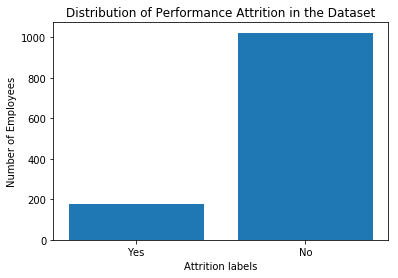

In [37]:
ybar=np.array([emp[emp['Attrition']=='Yes'].shape[0],
                emp[emp['Attrition']=='No'].shape[0]])
                

xbar=['Yes','No']

#Bar Visualization 
plt.bar(xbar,ybar)
plt.xlabel('Attrition labels')
plt.ylabel('Number of Employees')
plt.title('Distribution of Performance Attrition in the Dataset')

In [40]:
#creating a backup of original dataframe
emp1=emp.copy()

In [48]:
#selecting all the categorical columns and store it in a list to process for dummy variables
cat_cols=emp1.select_dtypes(include=object).columns.tolist()

In [60]:
#creating dummy variables for all the categorical columns and saving te results
emp1=pd.get_dummies(emp1,cat_cols)